abc= 0.2932758927345276
5
abc= 0.24321973323822021


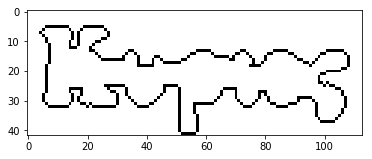

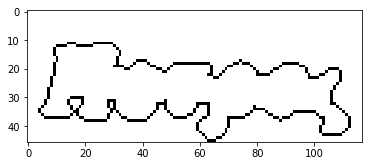

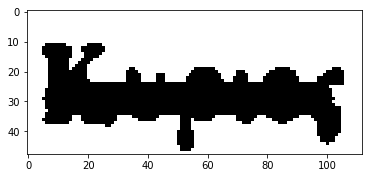

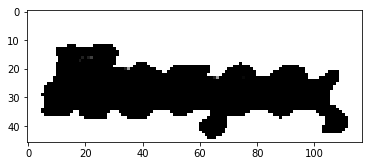

In [105]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

word1 = cv2.imread('tmp1/kyr1.png',0) # trainImage
word2 = cv2.imread('tmp1/kyr2.png',0) # trainImage
word2 = cv2.imread('tmp1/per1.png',0) # trainImage

#words=(word1,word2)



_, cnt1, _ = cv2.findContours(word1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
_, cnt2, _ = cv2.findContours(word2, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

#print(word1.shape)
x,y=word1.shape
word1Empty=np.zeros(word1.shape)+255
#contours_word1=cv2.drawContours(word1, cnt1, -1, (0,255,0), 1)
contours_word1=cv2.drawContours(word1Empty, cnt1, 1, (0,255,0), 1)
plt.figure()
plt.imshow(contours_word1,cmap="gray")
#print(word2.shape)
x,y=word2.shape
word2Empty=np.zeros(word2.shape)+255
#contours_word1=cv2.drawContours(word1, cnt1, -1, (0,255,0), 1)
contours_word2=cv2.drawContours(word2Empty, cnt2, 1, (0,255,0), 1)
plt.figure()
plt.imshow(contours_word2,cmap="gray")

sd = cv2.createShapeContextDistanceExtractor() 
abc = sd.computeDistance(cnt1[1],cnt2[1])

print("abc=",abc)
#print(word1)

###################

img1 = cv2.imread('tmp1/kyrios6.png',0) # trainImage

y,x=img.shape
y=y+22
#print(x,y)
#print(y//2)
lineThickness = 9
img1=cv2.line(img1, (10, y//2), (x-20, y//2), (0,255,0), lineThickness)
plt.figure()
plt.imshow(img1,cmap="gray")
_, cnt1, _ = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

img1 = cv2.imread('tmp1/kyrios7.png',0) # trainImage
img1 = cv2.imread('tmp1/per1.png',0) # trainImage
y,x=img.shape
#print(x,y)
#print(y//2)
y=y+22
lineThickness = 9
img1=cv2.line(img1, (10, y//2), (x-20, y//2), (0,255,0), lineThickness)
plt.figure()
plt.imshow(img1,cmap="gray")
_, cnt2, _ = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

print(len(cnt2))
sd = cv2.createShapeContextDistanceExtractor() 
abc = sd.computeDistance(cnt1[1],cnt2[1])

print("abc=",abc)




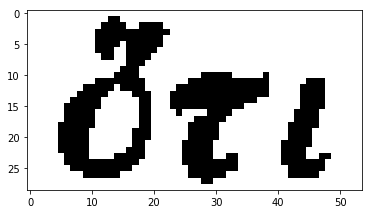

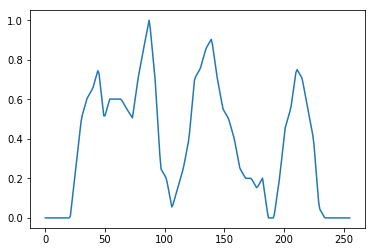

1.0


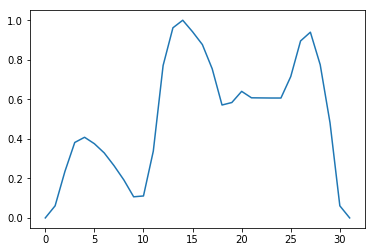

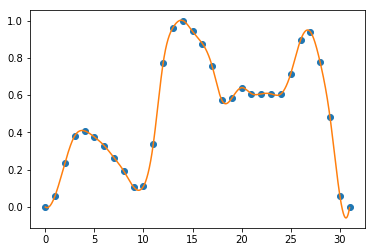

[1.         0.93959176 0.64023868 0.40796975]
14 27 20


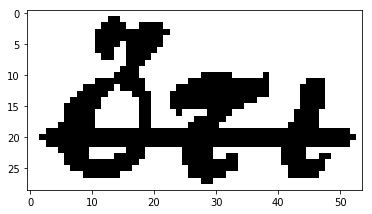

In [9]:

import matplotlib.pyplot as plt 
import numpy as np
import cv2
from scipy import interpolate

from scipy import optimize
from scipy.signal import argrelextrema



def hHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=0)
    ymax=max(y)
    y=y/ymax
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,1)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y
    
def vHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=1)
    ymax=max(y)
    y=y/ymax
    
    print(max(y))
    
    
    
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,0)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y
       
def local_min(ys):
    return [y for i, y in enumerate(ys)
            if ((i == 0) or (ys[i - 1] >= y))
            and ((i == len(ys) - 1) or (y < ys[i+1]))]  






img2= cv2.imread("test/0186.pdf300/1072-609-133-35.png",0);
img2 = cv2.imread("test/0162.pdf300/1535-837-136-36.png",0);
img2 = cv2.imread("test/0186.pdf300/932-459-131-38.png",0);
img2 = cv2.imread("word/gar.png",0);
img2 = cv2.imread("test/0186.pdf300/932-459-131-38.png",0);
img2= cv2.imread("word/oti.png",0);
newX=256
newY=32
#img2 = cv2.bitwise_not(img2)
#img2 = cv2.resize(img2,(int(newX),int(newY)))

plt.figure()
plt.imshow(img2, cmap='gray')









#x=len(yv)
x = np.arange(0, len(yv))
f = interpolate.interp1d(x, yv,kind='cubic')
xnew=x
xnew = np.arange(0, len(yv)-1, 0.01)
ynew = f(xnew)
plt.plot(x, yv, 'o', xnew, ynew, '-')
plt.show()


hHist(img2)   



yv=vHist(img2)


#print(local_min(yv))
#print(optimize.fminbound(f, 17, 31))
#print(optimize.fminbound(f, 6, 17))

#print(max(yv))

#index=np.where(yv > 0.6)
#print(max(y[index]))
#print(index)

#yv = np.array([1,2,3,4,5,4,3,2,1,2,3,2,1,2,3,4,5,6,5,4,3,2,1])
# determine the indices of the local maxima
maxInd = argrelextrema(yv, np.greater)
# get the actual values using these indices
ymax = yv[maxInd]  # array([5, 3, 6])
#print(ymax)

maxPoints=np.sort(ymax, axis=0)[::-1]
print(maxPoints)

m1=maxPoints[0]
m2=maxPoints[1]
Xind1=np.where(yv == m1)
Xind2=np.where(yv == m2)
x1=Xind1[0][0]
x2=Xind2[0][0]
xm=(x1+x2)//2
#print(maxInd[0])
#print(len(maxInd[0]))
print(x1,x2,xm)
w=img2.shape[1]
lineThickness=2
img2=cv2.line(img2, (3, xm), (w-3, xm), (0,255,0), lineThickness)
plt.figure()
plt.imshow(img2,cmap="gray")